<a href="https://colab.research.google.com/github/angelica892015/Case-DPO/blob/main/CaseDPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pandas

In [10]:
import pandas as pd

In [11]:

# URL do arquivo CSV
url = "https://raw.githubusercontent.com/angelica892015/Case-DPO/main/Case%20-%20DPO.csv"


In [13]:
# Carregando os dados
df = pd.read_csv(url, sep=';', encoding='latin1')

# Exibindo as primeiras linhas do dataframe
print(df.head())

# Identificando o tipo de dados de cada coluna
print(df.dtypes)

  COD_UN_NEGOCIO  COD_FRANQUIA  COD_MATERIAL                     DES_MATERIAL  \
0            EUD          3000          1643  COMB EUD SENS VELV CREM/SAB LIQ   
1            EUD          3002          1643  COMB EUD SENS VELV CREM/SAB LIQ   
2            EUD          3003          1643  COMB EUD SENS VELV CREM/SAB LIQ   
3            EUD          3004          1643  COMB EUD SENS VELV CREM/SAB LIQ   
4            EUD          3006          1643  COMB EUD SENS VELV CREM/SAB LIQ   

  DES_CATEGORIA  COD_CUPOM  COD_PDV    DT_VENDA COD_CANAL_VENDA  QT_ITEM  \
0         GIFTS      23727        1  02/02/2020              VD        1   
1         GIFTS     257323        1  18/02/2020              VD        1   
2         GIFTS     638148        1  05/03/2020              VD        1   
3         GIFTS     142725        1  21/03/2020              VD        1   
4         GIFTS     297819        1  06/04/2020              VD        1   

  VLR_VENDA  Unnamed: 11  
0     39,80          NaN  
1 

In [14]:
# Criando o resumo estatístico inicial
summary = df.describe()

# Exibindo o resumo estatístico inicial
print(summary)


       COD_FRANQUIA  COD_MATERIAL      COD_CUPOM      COD_PDV  QT_ITEM  \
count    1000.00000    1000.00000    1000.000000  1000.000000   1000.0   
mean     3004.50600   54991.16600   87972.490000     1.340000      1.0   
std      1415.08733   28049.05739  102998.047903     0.666967      0.0   
min      1000.00000    1643.00000     139.000000     1.000000      1.0   
25%      2002.00000   34861.25000   18905.250000     1.000000      1.0   
50%      3004.50000   45145.00000   42642.500000     1.000000      1.0   
75%      4006.00000   79778.00000  118421.500000     1.000000      1.0   
max      5008.00000   93302.00000  638148.000000     3.000000      1.0   

       Unnamed: 11  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Definindo o tamanho padrão dos gráficos
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Contagem por Categoria')

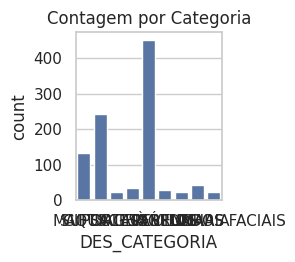

In [18]:
# Gráfico de barras para a variável DES_CATEGORIA
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='DES_CATEGORIA')
plt.title('Contagem por Categoria')

Text(0.5, 1.0, 'Contagem por Canal de Venda')

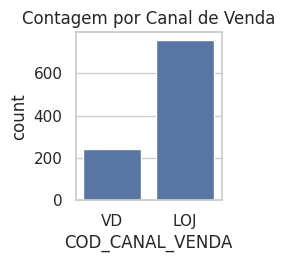

In [19]:
# Gráfico de barras para a variável COD_CANAL_VENDA
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='COD_CANAL_VENDA')
plt.title('Contagem por Canal de Venda')

Text(0.5, 1.0, 'Distribuição da Quantidade de Itens')

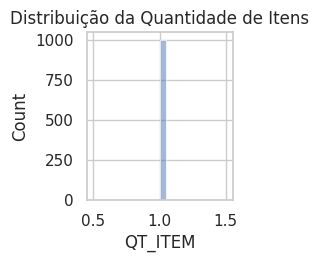

In [20]:
# Gráfico de barras para a variável QT_ITEM
plt.subplot(2, 3, 3)
sns.histplot(data=df, x='QT_ITEM', bins=20, kde=True)
plt.title('Distribuição da Quantidade de Itens')

Text(0.5, 1.0, 'Distribuição do Valor de Venda')

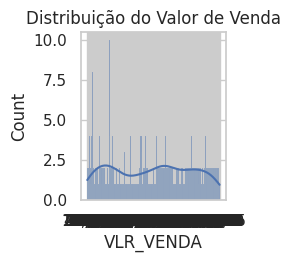

In [21]:
# Gráfico de barras para a variável VLR_VENDA
plt.subplot(2, 3, 4)
sns.histplot(data=df, x='VLR_VENDA', bins=20, kde=True)
plt.title('Distribuição do Valor de Venda')

In [22]:
# Exibindo os gráficos
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

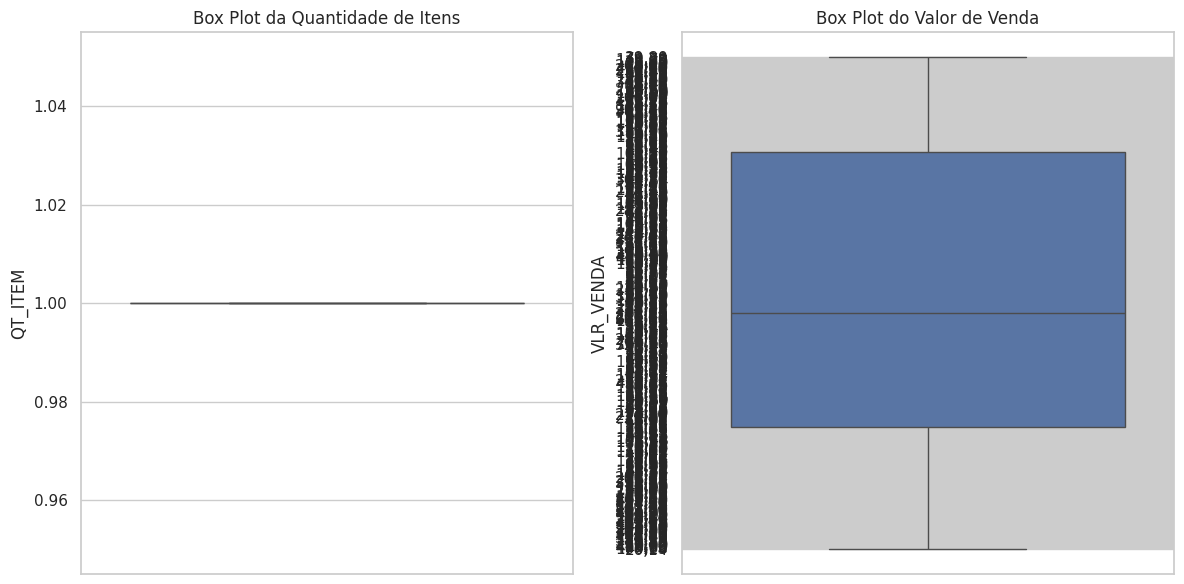

In [23]:
# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Definindo o tamanho padrão dos gráficos
plt.figure(figsize=(12, 6))

# Box plot para a variável QT_ITEM
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='QT_ITEM')
plt.title('Box Plot da Quantidade de Itens')

# Box plot para a variável VLR_VENDA
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='VLR_VENDA')
plt.title('Box Plot do Valor de Venda')

# Exibindo os gráficos de box plot
plt.tight_layout()
plt.show()


In [24]:
# Identificando valores ausentes
missing_values = df.isna().sum()

# Exibindo os valores ausentes
print(missing_values)


COD_UN_NEGOCIO        0
COD_FRANQUIA          0
COD_MATERIAL          0
DES_MATERIAL          0
DES_CATEGORIA         0
COD_CUPOM             0
COD_PDV               0
DT_VENDA              0
COD_CANAL_VENDA       0
QT_ITEM               0
VLR_VENDA             0
Unnamed: 11        1000
dtype: int64


<ipython-input-26-5aa7d74e4d4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['COD_MATERIAL', 'VLR_VENDA']].corr()


Matriz de Correlação:
              COD_MATERIAL
COD_MATERIAL           1.0


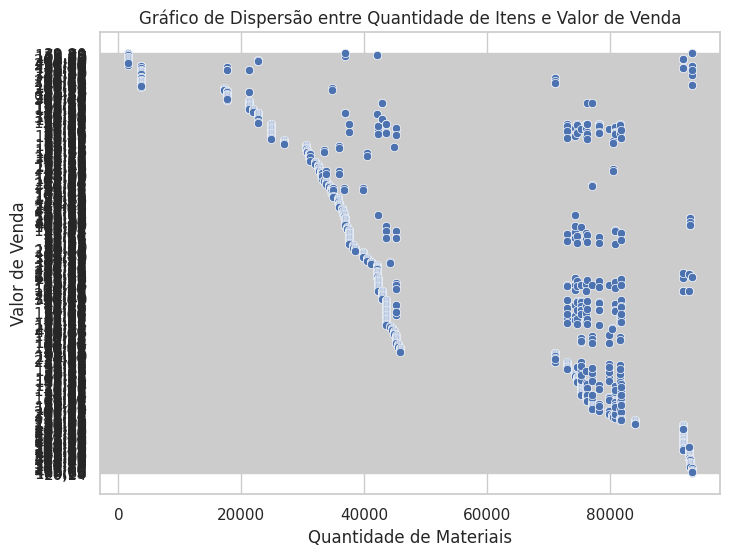

In [26]:
# Calculando correlações entre as variáveis numéricas
correlation_matrix = df[['COD_MATERIAL', 'VLR_VENDA']].corr()

# Exibindo a matriz de correlação
print("Matriz de Correlação:")
print(correlation_matrix)

# Criando um gráfico de dispersão para visualizar a associação entre as variáveis numéricas
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='COD_MATERIAL', y='VLR_VENDA')
plt.title('Gráfico de Dispersão entre Quantidade de Itens e Valor de Venda')
plt.xlabel('Quantidade de Materiais')
plt.ylabel('Valor de Venda')
plt.show()
